In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [4]:
#dataSet
X=load_boston().data
X.shape

(506, 13)

In [5]:
#labels
y=load_boston().target
y.shape

(506,)

In [6]:
#ridge regression
alphas=np.logspace(start=-3,stop=2,num=50)
score_Ridge=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    test_score=np.sqrt(-1*cross_val_score(estimator=ridge,X=X,y=y,scoring='neg_mean_squared_error',cv=10))
    score_Ridge.append(np.mean(test_score))
score_Ridge

[5.1854333510531214,
 5.1853769923939295,
 5.1853057615792411,
 5.1852157523751412,
 5.1851020434992714,
 5.184958441400318,
 5.184777161780552,
 5.1845484376551685,
 5.1842600408161879,
 5.1838967036779131,
 5.1834394305664739,
 5.1828646930691562,
 5.1821435153584821,
 5.1812404757875283,
 5.1801126851477983,
 5.1787088557428334,
 5.1769686555822005,
 5.1748226542144842,
 5.172193311422502,
 5.1689976243309816,
 5.1651521930917852,
 5.1605815068721466,
 5.1552300476872279,
 5.1490781626793352,
 5.1421603735615751,
 5.1345828410230983,
 5.1265344575969705,
 5.1182845257541976,
 5.1101607736047674,
 5.1025059477650814,
 5.0956191410986893,
 5.0896963424032284,
 5.0847884984765681,
 5.0807911075670145,
 5.0774682693825586,
 5.074502116065732,
 5.0715519533864564,
 5.0683084874632129,
 5.0645347173995221,
 5.0600921609861782,
 5.0549560626370482,
 5.0492252760474639,
 5.0431319084766031,
 5.037052778357995,
 5.0315193769604383,
 5.0272164738931604,
 5.0249550496332986,
 5.025607674699141

In [7]:
#random forest
max_features=[0.1,0.3,0.5,0.7,0.9,0.99]
score_RF=[]
for max_feature in max_features:
    RF=RandomForestRegressor(n_estimators=200,max_features=max_feature)
    test_score=np.sqrt(-1*cross_val_score(estimator=RF,X=X,y=y,scoring='neg_mean_squared_error',cv=10))
    score_RF.append(np.mean(test_score))
score_RF

[4.9859389329977333,
 4.0658825884424648,
 3.9190103235468796,
 4.0101216785065796,
 4.084983721779591,
 4.1577989158430251]

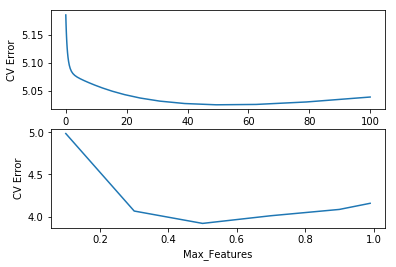

In [8]:
#draw pic
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)

ax1.plot(alphas,score_Ridge,label="Alpha vs CV Error")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("CV Error")

#ax1.title("")


ax2.plot(max_features,score_RF,label="Max_Features vs CV Error")
ax2.set_xlabel("Max_Features")
ax2.set_ylabel("CV Error")

plt.show()